In [1]:
# All necessary imports for SVM classification
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
#Data preparation

team_number = 0
team_dict = dict()
matches_df = pd.read_csv('/Users/rahulomalur/Desktop/Sem 5/ML/ML Project/ELO-Insights/training_dataset.csv')
for team in list(set(matches_df['Home Team'])):
    if team not in team_dict:
        team_number += 1
        team_dict[team] = team_number
matches_df.drop(columns=['Date', 'Home Goals', 'Away Goals'], inplace=True)

matches_df['Home Team'] = matches_df['Home Team'].map(team_dict)
matches_df['Away Team'] = matches_df['Away Team'].map(team_dict)

matches_df.head()

,Home Team,Away Team,Home_Team_Rating,Away_Team_Rating,Winner
0,20,2,1516,1484,1
1,3,35,1516,1484,1
2,42,10,1516,1484,1
3,26,50,1500,1500,0
4,5,25,1484,1516,-1


In [3]:

#X and Y preparation for filtered data only considering matches with a winner
filtered_df = matches_df[matches_df['Winner'] != 0]
Y_filtered = np.array(filtered_df['Winner'])
X_filtered_df = filtered_df[['Home Team', 'Away Team', 'Home_Team_Rating', 'Away_Team_Rating']]
X_filtered = np.array(X_filtered_df)
scaler = StandardScaler()
X_filtered = scaler.fit_transform(X_filtered)
x_filtered_train, x_filtered_test, y_filtered_train, y_filtered_test = train_test_split(X_filtered, Y_filtered, test_size=0.2)

In [4]:
#Training the data by fitting the SVM model to the filtered data
svm_model = SVC(kernel='rbf', decision_function_shape='ovr')


svm_model.fit(x_filtered_train, y_filtered_train)

#Obtaining predictions for the test data
y_filtered_pred = svm_model.predict(x_filtered_test)

Accuracy: 0.76
              precision    recall  f1-score   support

          -1       0.72      0.58      0.64       657
           1       0.78      0.87      0.82      1129

    accuracy                           0.76      1786
   macro avg       0.75      0.72      0.73      1786
weighted avg       0.76      0.76      0.76      1786



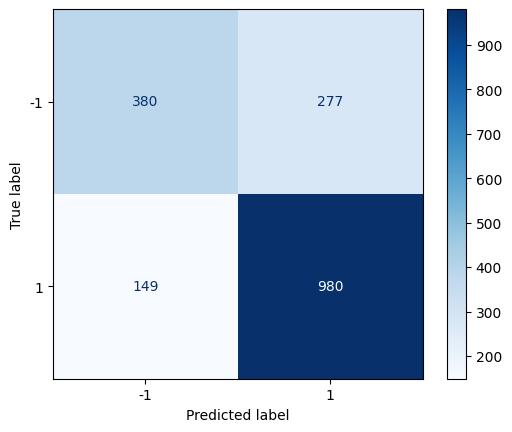

In [5]:
#Accuracy metrics for the filtered data

accuracy = accuracy_score(y_filtered_test, y_filtered_pred)
print(f'Accuracy: {accuracy:.2f}')


classification_report_str = classification_report(y_filtered_test, y_filtered_pred)
print(classification_report_str)


cm = confusion_matrix(y_filtered_test, y_filtered_pred, labels=np.unique(y_filtered_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_filtered_test))
disp.plot(cmap=plt.cm.Blues)
plt.show()


Our accuracy and corresponding metrics improve drastically with the exclusion of draws so now we will try to figure out why this phenomenon is occuring.

Furthermore, we will try to improve the accuracy by extracting more features from our data and testing again